In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Folder = {'Source' : r'C:\Users\abby0\OneDrive\Desktop\MSADS\ADS-500B Data Science Programming\Final Project\\',
          'Output' : r'C:\Users\abby0\OneDrive\Desktop\MSADS\ADS-500B Data Science Programming\Final Project\\' }

In [4]:
df = pd.read_csv(Folder['Source'] + 'online_shoppers_intention.csv')

In [6]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [7]:
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())

(12330, 18)
Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object
Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
Ope

In [8]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

## correlation

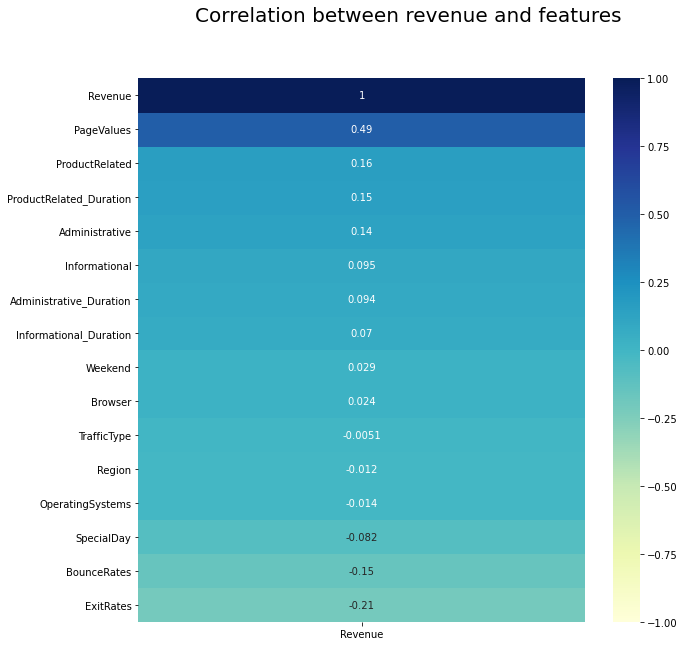

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Correlation between revenue and features',fontsize=20)
ax=sns.heatmap(df.corr()[["Revenue"]].sort_values("Revenue"),vmax=1, vmin=-1, cmap="YlGnBu", annot=True, ax=ax);
ax.invert_yaxis()

## data exploration 

No handles with labels found to put in legend.


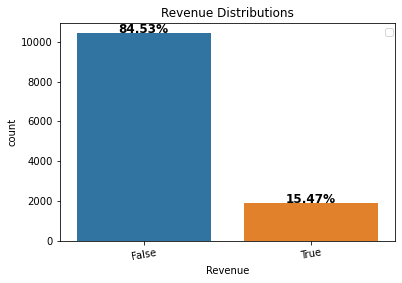

In [10]:
def countplot_ratio(x,data,hue=None,ax=None):
    ax=sns.countplot(x,data=data,hue=hue,ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
    ax.set_title("Revenue Distributions")
    ax.legend(bbox_to_anchor=(1.01,1))
    total = float(len(data))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,
                '{:.2f}%'.format((height/total)*100),fontsize=12, weight = 'bold',ha="center")
countplot_ratio("Revenue",df)

In [12]:
def kdeplot_revenue(col,ax=None):
    ax = sns.kdeplot(df[col][(df["Revenue"] == 1) ],color="Red",ax=ax)
    ax = sns.kdeplot(df[col][(df["Revenue"] == 0) ],color="Blue",ax=ax)
    ax.legend(["True","False"],loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(col)
    ax.set_title("Distribution of "+ col +" Revenue")

C:\Users\abby0\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


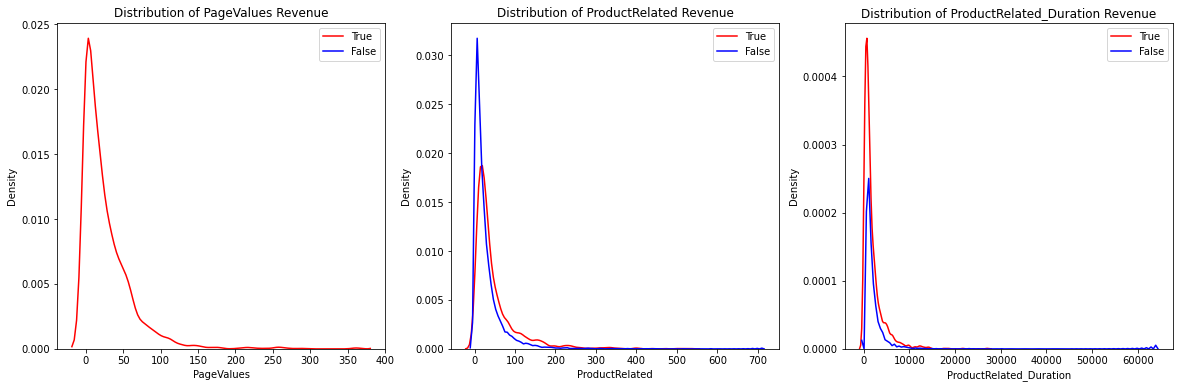

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 3,figsize = (20,6))
kdeplot_revenue("PageValues",ax=axes[0])
kdeplot_revenue("ProductRelated",ax=axes[1])
kdeplot_revenue("ProductRelated_Duration",ax=axes[2])

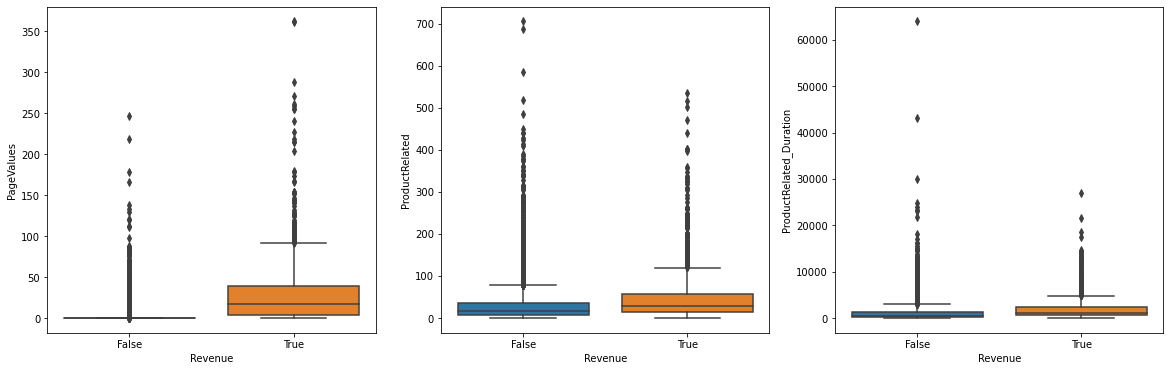

In [14]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (20,6))
ax = sns.boxplot(x="Revenue",y="PageValues",data=df,ax=axes[0])
ax = sns.boxplot(x="Revenue",y="ProductRelated",data=df,ax=axes[1])
ax = sns.boxplot(x="Revenue",y="ProductRelated_Duration",data=df,ax=axes[2])

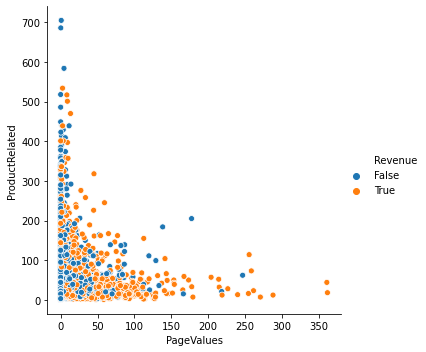

In [15]:
sns.relplot(x='PageValues', y='ProductRelated', hue="Revenue", data=df)

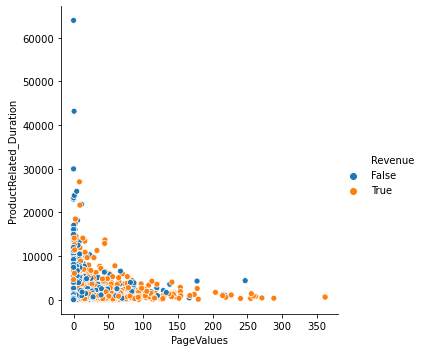

In [16]:
sns.relplot(x='PageValues', y='ProductRelated_Duration', hue="Revenue", data=df)

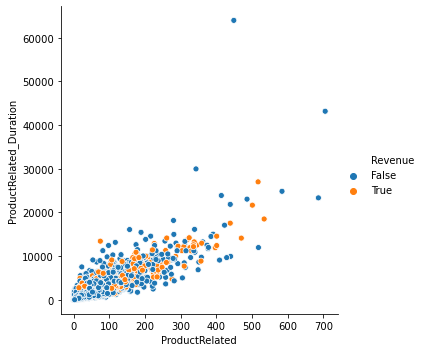

In [17]:
sns.relplot(x='ProductRelated', y='ProductRelated_Duration', hue="Revenue", data=df)